<b>Group Number:</b> 
<br><b>Name Group Member 1:</b> 
<br><b>u-Kürzel Group Member 1:</b> 
<br><b>Name Group Member 2:</b> 
<br><b>u-Kürzel Group Member 2:</b> 

# Task 3: Unsupervised Learning with PCA and Clustering

In this notebook, we will dive into the Iris dataset—a classic dataset containing measurements of petal and sepal lengths for three distinct types of irises, a unique class of flowering plants. This time, we shift our focus to unsupervised learning, a powerful approach in machine learning that works without labeled outcomes.

In unsupervised learning, we have access only to the input data, $x$, without any accompanying target labels, $y$. This might lead to the question: without target outputs, what exactly is our objective? In unsupervised learning, the goal is not to predict a specific outcome but to discover underlying structures or patterns within the data. Various unsupervised learning techniques approach this task differently, uncovering unique forms of data structure.

For this task, we will explore two prominent unsupervised learning methods: Principal Component Analysis (PCA) and K-Means Clustering. We will apply these techniques to the Iris dataset to better understand how they work and what insights they can reveal.

### Learning Goals for Today

By the end of this notebook, you will be able to:
- Explain the difference between supervised and unsupervised learning.
- Describe the functionality of Principal Component Analysis (PCA) and implement it.
- Use PCA to reduce the dimensionality of data.
- Outline the fundamental principles of the K-Means Clustering algorithm.
- Implement and evaluate clustering performance using suitable metrics.

<div class="alert alert-block alert-success">
<b>Question (1 pt):</b> What are the two main differences regarding creating data and training/evaluation between supervised and unsupervised learning?
Tip: Think of the input and output of the two categories!
</div>
<div class="alert alert-block alert-success">
<b>Your Answer:</b> In supervised learning the training and the test data is labelled but in unsupervised learning it is unlabelled. furthrmore in supervised learning the input data is known and we have a rough idea on how the output data shoul look like but in unsupervised learning there is no prediction of the output data
</div>

# 1. Principal Component Analysis (PCA)

Unsupervised learning methods serve various purposes, one of the most common being dimensionality reduction. This technique aims to simplify complex datasets without significant loss of information by combining correlated features into one. For instance, a car's mileage correlates with its age; a dimensionality reduction algorithm can merge these into a single feature that reflects overall wear. This process is often called feature extraction.

Another application of unsupervised learning is data visualization, where complex, unlabeled data is transformed into a 2D or 3D representation that retains its structure as closely as possible, helping reveal hidden patterns or clusters within the data. Today, we will apply Principal Component Analysis to visualize datasets and reduce their dimensionality.

## 1.1 Intuition, Theory, and Application

Principal Component Analysis (PCA) is a popular, intuitive approach to dimensionality reduction, projecting data onto an orthogonal feature subspace. This subspace is defined by linear combinations of the original features, each combination being orthogonal to the others. PCA first identifies the hyperplane closest to the data, then projects the data onto it, preserving as much of the original information as possible.

### Why Reduce Dimensionality?

In most datasets, each sample can be viewed as a vector of features, and the collective space of all such vectors forms what we call the feature space. This space can have many dimensions, making analysis challenging. Dimensionality reduction simplifies this by reducing the number of features while retaining critical information, easing analysis and computational requirements. 

In practice, PCA accomplishes this by creating new features as linear combinations of the original ones, using weighted sums. For example, a new feature might be constructed as follows:


$(x_{\text{pca}})_0 = 0.27 \cdot (x_{\text{input}})_0 - 4.21 \cdot (x_{\text{input}})_1 + 1.31 \cdot (x_{\text{input}})_2$


These transformations are computationally efficient, expressible as simple matrix multiplications, and effective in reducing data dimensions while preserving essential information.

<table class="image">
<caption align="bottom">Selection of a subspace for projection [Geron, 2018]</caption>
<tr><td><img src='images/pca_projection_geron.png' width=70% /></td></tr>
</table>


The figure above provides an example of PCA in action. On the left is a simple 2-D dataset with three potential axes (one-dimensional hyperplanes). On the right are the projections of this dataset onto each axis. As you can see, the projection onto the solid line retains the maximum variance, while the projection onto the dotted line retains very little. The dashed line projection falls somewhere in between.

Selecting the axis that preserves the maximum variance makes sense, as it retains the most information from the dataset. This choice can also be justified by observing that it minimizes the mean square distance between the original dataset and its projection, thereby reducing the projection error. This is the essence of PCA: it finds the principal components by maximizing the variance of the projected data, which also minimizes reconstruction error.

<img align="right" src='images/pca_projection_connection.png' width="400"/>

PCA searches for the axis along which the training data has the highest variance. Once it finds this axis, it identifies a second axis, orthogonal to the first, that captures the largest remaining variance. In higher-dimensional data, PCA continues in this manner, identifying as many orthogonal axes (principal components) as there are dimensions in the dataset. In the figure, the first principal component is $c_1$, and the second is $c_2$.

Broadly speaking, PCA treats the dataset as an ellipsoid within a subspace of the original feature space. The new basis vectors align with the ellipsoid's axes, which allows us to remove highly correlated features since each new basis vector is orthogonal. In general, the ellipsoid’s dimensionality matches that of the initial space, but if we assume that our data lies within a lower-dimensional subspace, we can "cut off" the unneeded dimensions with this projection. PCA accomplishes this by sequentially selecting the directions (ellipsoid axes) where variance is greatest.

> "To deal with hyper-planes in a 14-dimensional space, visualize a 3D space and say 'fourteen' very loudly. Everyone does it." – Geoffrey Hinton


Let's look into the mathematical formulation of PCA:

To reduce the dimensionality of data from $n$ to $k$ (where $k \leq n$), we rank our axes in descending order of data dispersion and select the top-$k$ axes.

### Finding the Principal Components

To identify the principal components for a dataset, we start by calculating the variance and covariance of the original features, typically using the covariance matrix. The covariance between two features can be computed as:


$$\Large \text{cov}(X_i, X_j) = E[(X_i - \mu_i) (X_j - \mu_j)] = E[X_i X_j] - \mu_i \mu_j$$


where $\mu_i$ is the expected value (mean) of the $i^{\text{th}}$ feature. Note that the covariance is symmetric, and the covariance of a feature with itself equals its variance.

Thus, the covariance matrix is symmetric, with variances of individual features on the diagonal and covariances between feature pairs as the off-diagonal elements. For a dataset represented by matrix $\mathbf{X}$, the covariance matrix $\mathbf{C}$ is:


$$\Large \mathbf{C} = E\left[(\mathbf{X} - E[\mathbf{X}]) (\mathbf{X} - E[\mathbf{X}])^{T}\right]$$

In a two-dimensional case, the covariance matrix $\mathbf{C}$ looks like:

$$
\Large
\mathbf{C} = \begin{pmatrix}
\sigma_{X_1}^2 & \text{cov}(X_1, X_2) \\
\text{cov}(X_2, X_1) & \sigma_{X_2}^2 \\
\end{pmatrix}
$$

For a mean-centered dataset (i.e., $\mu = 0$), the computation simplifies to:


$$\Large \mathbf{C} = \frac{\mathbf{X} \cdot \mathbf{X}^T}{n-1}$$

### Maximizing Variance in Projected Space

The objective of PCA is to maximize the variance in the projected space. For a data matrix $\mathbf{X}$, the projection on a vector $w$ is given by $\mathbf{X}w$, and the variance of this projection is:

$$\Large \sigma_w^2 = \frac{1}{n-1}(\mathbf{X}w)^T \cdot \mathbf{X}w = w^T \cdot \left(\frac{1}{n-1} \mathbf{X}^T \mathbf{X}\right) \cdot w = w^T \mathbf{C} w$$

Thus, maximizing variance in PCA involves finding the vector $w$ that maximizes this expression for variance in the projected data.


Let's quickly recap a key concept: matrices, as linear operators, have eigenvalues and eigenvectors. These are useful because eigenvectors describe directions in space that remain fixed under transformation by the matrix; they are merely stretched by a factor called the eigenvalue. Formally, for a matrix $\mathbf{M}$, an eigenvector $v_i$ with eigenvalue $\lambda_i$ satisfies:

$$
\mathbf{M} v_i = \lambda_i v_i
$$

Given that our covariance matrix $\mathbf{C}$ is symmetric, it can be diagonalized by selecting an orthogonal coordinate system, defined by the eigenvectors of $\mathbf{C}$. This transforms the covariance matrix into a diagonal form:

$$\Large
\mathbf{C_{EV}} = \begin{pmatrix}
\lambda_1 & 0 \\
0 & \lambda_2 \\
\end{pmatrix}
$$

Here, the covariance matrix in the new basis is diagonal, indicating that the dimensions are uncorrelated ($\text{cov}(EV_1, EV_2) = 0$), with the eigenvalues $\lambda_i$ on the diagonal. Substituting this into the variance expression $\sigma_w^2$ yields:

$$ \Large
\sigma_w^2 =  w^T \mathbf{C}_{EV} w = \sum_i \lambda_i w_i^2
$$

Thus, in the new orthogonal basis, the variance is a weighted sum of the eigenvalues. The maximum possible variance is achieved by projecting onto the axis corresponding to the largest eigenvalue. Therefore, the direction of the first principal component is defined by the eigenvector associated with the largest eigenvalue of the covariance matrix.

By arranging all eigenvectors into a matrix, we get:

$$ \Large
\mathbf{V} = \begin{pmatrix}
\mid & \mid & & \mid \\
{\bf v}_{1} & {\bf v}_{2} & \cdots & {\bf v}_{n}\\
\mid & \mid & & \mid \\
\end{pmatrix}
$$

To retain only the principal components, we select the top-$k$ eigenvectors corresponding to the largest eigenvalues of $\mathbf{C}$. This ensures that the first principal component (the eigenvector with the largest eigenvalue) points in the direction of maximal variance in the centered data (i.e., the data centered around the origin).

### Steps for Performing PCA

1. **Define** the target dimensionality $k < d$.
  
2. **Mean-center** the dataset $\mathbf{X}$ (i.e., subtract the mean of each feature from the data).

3. **Compute** the covariance matrix $\mathbf{C}$ of the centered data $\mathbf{X}$.

4. **Perform eigenvalue decomposition** on the covariance matrix:
    $$\Large
    \mathbf{C} \cdot v_i = \lambda_i \cdot v_i
    $$

5. **Sort eigenvectors** $v_i$ by their eigenvalues $\lambda_i$ in descending order to form the matrix $V \in \mathbb{R}^{d \times d}$.

6. **Select the top-$k$ eigenvectors** as the principal components:
    $$\Large
    V = \begin{pmatrix}
    v_{1,1} & \cdots & v_{1,k} \\
    \vdots & & \vdots \\
    v_{d,1} & & v_{d,k} \\
    \end{pmatrix} \in \mathbb{R}^{d \times k}
    $$

7. **Project the data** onto the new subspace:
    $$\Large
    Z = X V \in \mathbb{R}^{m \times k}
    $$

8. **Evaluate Information Loss**  through either:
   - **Lost Variance**: $\sum_{i=k+1}^n \lambda_i$
   - **Reprojection Error**: $\lVert \mathbf{X} - \mathbf{X}ww^T \rVert^2$

Following these steps, PCA provides a low-dimensional representation of the data, maximizing retained variance while discarding components with lower variability.


## 1.2 Developing a PCA Implementation

In this section, we will walk through a simple implementation of PCA to deepen our understanding of its core principles. However, as part of the course restructuring, you’re not required to implement it yourself. Instead, focus on following along with the code to understand how PCA works. Enjoy, and try to grasp each step in the process!

### 1.2.1 Understanding PCA with the Iris Dataset

Let’s have a look on the Iris dataset from Task 2. First, we’ll load the necessary libraries and import the dataset to begin our PCA exploration.


In [2]:
# Imports
import pandas as pd
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn import decomposition
from IPython import display
%matplotlib inline
%matplotlib widget
from typing import *

import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np

from lama.test_functions import UnsupervisedLearning_Tests

test_func = UnsupervisedLearning_Tests()

plt.style.use(['seaborn-v0_8-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

Second, we load the [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) flower dataset from the csv file. The sepal length is plotted against the petal width of the flowers.

Text(0, 0.5, 'Petal width')

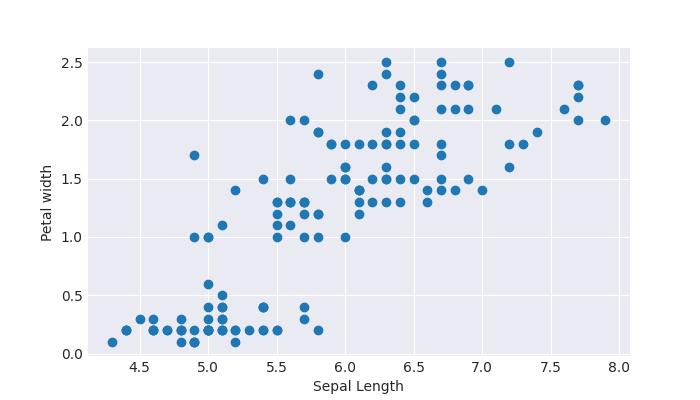

In [3]:
# Load dataset
filename = 'data/iris.data.csv'
names = ['Sepal-length', 'Sepal-width', 'Petal-length', 'Petal-width', 'Class']
X = pd.read_csv(filename, names=names)
# split label info
y = X.Class
# drop labels from data
X = X.drop(['Class'], axis=1)
plt.figure(figsize=(7, 4))
plt.scatter(X['Sepal-length'], X['Petal-width'])
plt.xlabel('Sepal Length')
plt.ylabel('Petal width')

<div class="alert alert-block alert-info">
<b>Note:</b> As you may see, we have target values (aka labels) for our data, so we could also use supervised methods. But we can also make use of the labels in the unsupervised context, which we will see later on.

</div>

The next step in our analysis would typically involve exploring the dataset through various statistical measures and plots. However, as we performed a similar exploration in Task 2 with the Titanic dataset, we’ll skip this step here.

Instead, we’ll proceed directly to preparing our data for PCA according to step two of the PCA pseudocode. This involves mean-centering our data.

In [4]:
# center X by mean
X_centered: pd.DataFrame
X_centered = X - X.mean()

#Quick Check
assert (np.abs(X_centered.mean()) < 0.00000001).all(), f'The mean of the X_centered dataset was expected to be zero or close to zero, but found the mean to be {X_centered.mean()}'

Based on the previous plot, it appears that sepal length and petal width may be correlated. To confirm this, we calculate Pearson's correlation coefficient between these two features. A high correlation coefficient would indicate a strong linear relationship, validating our suspicion that these features are indeed strongly correlated.

In [5]:
# STUDENT CODE HERE (1pt)

correlation, pvalue = pearsonr(X['Sepal-length'], X['Petal-width'])
print(correlation, pvalue)

# STUDENT CODE until HERE

0.8179536333691635 2.3148491512728037e-37


To better understand PCA, we created an interactive widget that illustrates its working principle. The widget displays a scatterplot of sepal length versus petal width for our dataset, with a black solid line representing the projection axis. You can adjust the angle of this axis using the slider above the plot, which controls the line’s orientation.

As you change the angle, the widget projects the data points onto this selected axis, and the reprojection error (the loss of information from the projection) is calculated and displayed. This visualization helps us see how different projection angles impact the data representation and information retention.
To get a better idea of the PCA, we first want to show the working principle, therefore we made an interactive widget. The widget shows a scatterplot of the sepal length and the petal width of our dataset. The data will be projected on to the selected axis shown as a black solid line. The axis of projection can be set with the slider above the image, which controls the angle of the line. The loss of the projection (reprojection error) is also calculated.

In [6]:
def projection_error(pointsOrig,projectionMatrix):
    pointsProjected = pointsOrig.dot(projectionMatrix).dot(projectionMatrix.T)
    sumSquaredDistance = sum(sum((pointsProjected-pointsOrig)**2))
    projErr = sumSquaredDistance/len(pointsOrig)
    return projErr
def variance_projected(pointsOrig, projectionMatrix):
    z = pointsOrig.dot(projectionMatrix)
    return np.var(z[:,0])
def print_loss_gain(pointsOrig,projectionMatrix):
    print(f'Projection Error: {projection_error(pointsOrig, projectionMatrix):0.4f}')
    print(f'Projected Variance: {variance_projected(pointsOrig, projectionMatrix):0.4f}')

In [7]:
# Function to update the PCA visualization
def update_pca_2D_with_figure(X_data: pd.DataFrame, alpha: float, ax: plt.Axes):
    ax.clear()  
    w = np.array([np.cos(np.deg2rad(alpha)), np.sin(
        np.deg2rad(alpha))]).reshape(2, 1)
    z = X_data.values.dot(w).dot(w.T)

    for i in range(len(X_data)):
        ax.plot([X_data.values[i, 0], z[i, 0]], [
                X_data.values[i, 1], z[i, 1]], c='r')

    ax.plot(w[0] * 3.5 * np.array([-1, 1]), w[1]
            * 3.5 * np.array([-1, 1]), c='k')
    ax.plot(-w[1] * 2 * np.array([-1, 1]), w[0] *
            2 * np.array([-1, 1]), c=(0.6, 0.6, 0.6))

    ax.scatter(z[:, 0], z[:, 1], c='r')
    ax.scatter(X_data.values[:, 0], X_data.values[:, 1], c='b')
    ax.scatter(0, 0, 65, c='k', linewidth=2)

    print_loss_gain(X_data.values, w)

    minval = min(min(X_data.values[:, 0]), min(X_data.values[:, 1]))
    maxval = max(max(X_data.values[:, 0]), max(X_data.values[:, 1]))
    ax.set_xlim([minval, maxval])
    ax.set_ylim([minval, maxval])
    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Petal Width')
    ax.set_title(f'PCA Visualization (Alpha: {alpha:.1f}°)')
    plt.draw() 

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Alpha:', layout=Layout(widt…

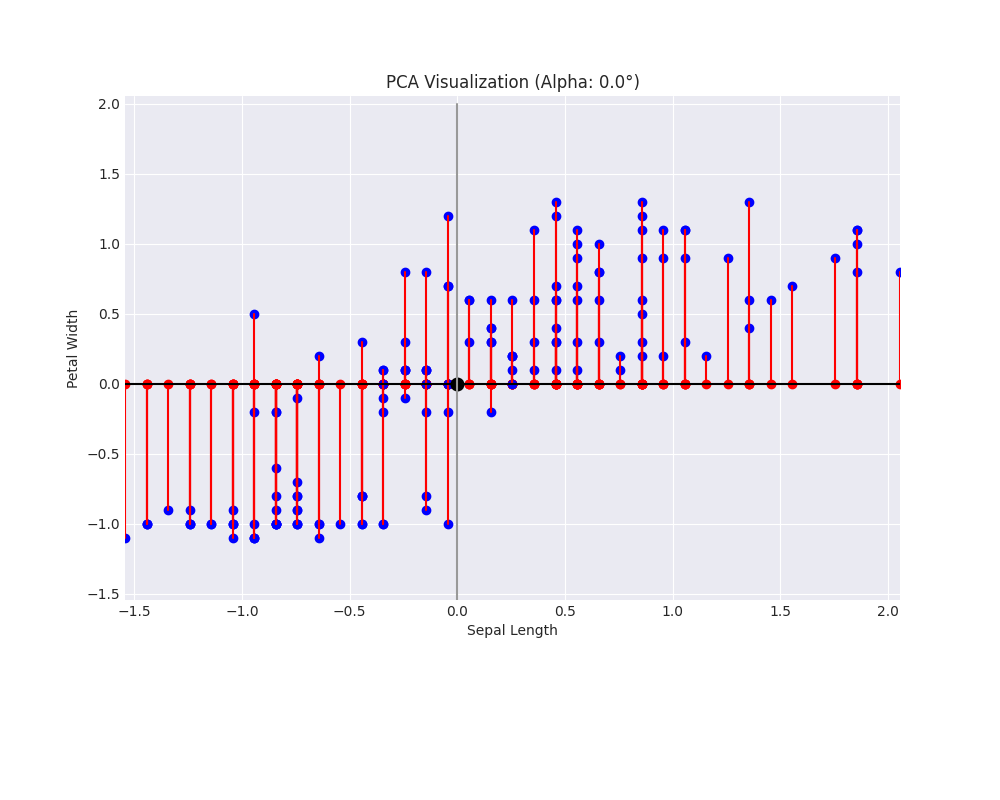

In [8]:
# Initialize the figure
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figure size as needed
plt.subplots_adjust(bottom=0.25)  # Reduce the bottom margin to minimize the gap

# Prepare the data
X0 = X_centered[['Sepal-length', 'Petal-width']]

# Define the interactive slider
alpha_slider = widgets.FloatSlider(
    value=0,  # Default value
    min=-90,  # Minimum value
    max=90,   # Maximum value
    step=0.2, # Step size
    description='Alpha:',
    continuous_update=False,
    layout=widgets.Layout(width='90%')  # Adjust slider width
)

# Create the interactive plot
interactive_plot = widgets.interactive(update_pca_2D_with_figure, alpha=alpha_slider,ax = widgets.fixed(ax), X_data=widgets.fixed(X0))

# Display the slider and plot together
display.display(interactive_plot)


Here, the goal is to maximize the variance while minimizing the projection error (loss). This happens when the first principle component (the black line) is at approx. 40°. The grey line shows the second principle component. A loss is inevitable when we try to reduce the dimensionality, because we lose some information. However, we try to optimize it by choosing the directions with the highest variances. 

### 1.2.2 Implementing the PCA function.

Directions of principal components:
1st component: [-0.7414199   0.67104138] 
2nd component: [-0.67104138 -0.7414199 ]
Loss by PCA transformation:  0.0


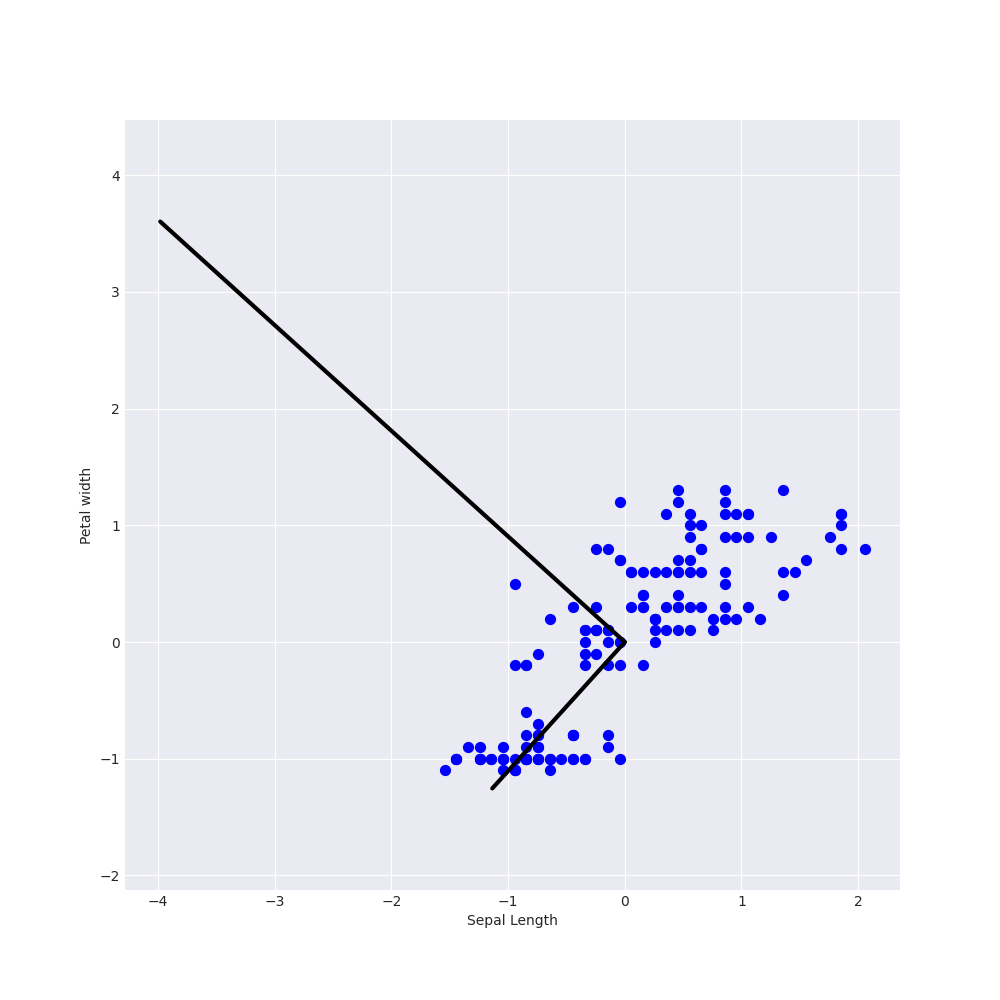

In [9]:
def pca_own(X: pd.DataFrame, k: int) -> Tuple[np.ndarray, np.ndarray, float]: 
    """ Calculates the Principal Component Analysis of X
        Args: 
            X : correctly scaled matrix of data, each row is an observation
            k (int) : number of components selected for the output.
        Returns: 
            w : k eigenvalues 
            V : the matrix of k principal components
            loss: the error made by using only k components as feature space
    """
    # Tip: use the argsort() function to get the indices for sorting of V
    w_sorted: np.ndarray
    V_sorted: np.ndarray
    loss: float
    # Calculate the covariance matrix
    cov = np.cov(X.T)
    # perform the eigenvalue decomposition
    w, V = np.linalg.eigh(cov)
    #sort the columns of V with the eigenvalues w

    # Tip: use the argsort() function to get the indices for sorting of V
    wInds = w.argsort()
    w_sorted = w[wInds[::-1]]
    V_sorted = V[wInds[::-1]] 
    
    #calculate loss via eigenvalues
    loss = np.sum(w_sorted[k:])
    # return the k eigenvalues, the k principal components and the loss
    return w_sorted[:k], V_sorted[:,:k], loss


# select features for demonstration
X0 = X_centered[['Sepal-length','Petal-width']]

# We call our PCA function with given k
w, V, loss = pca_own(X0,2)

# DO NOT CHANGE
print('Directions of principal components:\n' +\
      '1st component:',
      V[:,0],
      '\n2nd component:', 
      V[:,1]
     )
print('Loss by PCA transformation: ',loss)


# Plotting function
plt.figure(figsize=(10,10))
plt.scatter(X0['Sepal-length'], X0['Petal-width'], s=50, c='b')

# Transpose matrix for plotting purposes
V_transp = V.T

for l, v in  zip(w, V_transp):
    d = 5 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=3)
    
plt.axis('equal')

plt.xlabel('Sepal Length')
plt.ylabel('Petal width')
plt.show()

The loss is zero because we had a two-dimensional dataset and used two principal components. Therefore, we did't lose any information, we only used different basis vectors/ a different coordinate system to interprete our data points.

### 1.2.3 Reducing the Dimension

Till now, we have seen the direction of the first two principal components of the dataset $X0$. Now we want to use the whole dataset $X_{centered}$ to be reduced on two variables. The function for visualizing the results is given below. The color of the dots is indicating the target value (=iris class).

0.10220693522015523
Directions of principal components:
1st component: [ 0.75112056 -0.47971899 -0.32409435  0.31725455] 
2nd component: [ 0.54906091  0.07252408  0.59641809 -0.58099728]
Meaning of the 2 components:
0.751 x Sepal-length + -0.480 x Sepal-width + -0.324 x Petal-length + 0.317 x Petal-width
0.549 x Sepal-length + 0.073 x Sepal-width + 0.596 x Petal-length + -0.581 x Petal-width


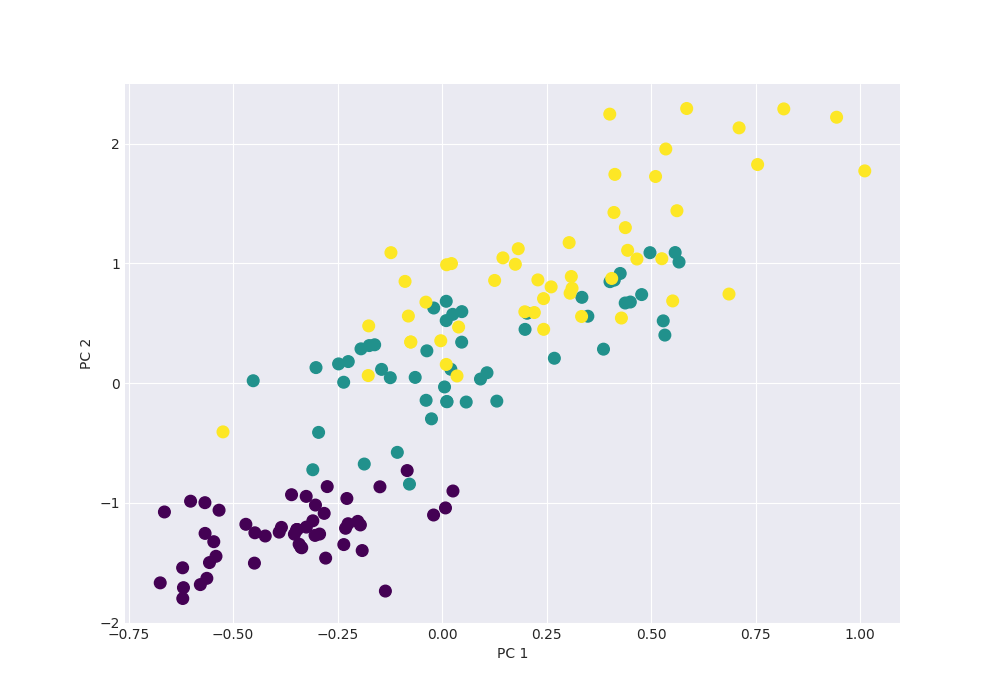

In [10]:
w: np.ndarray
V: np.ndarray
loss: float
X_transformed: np.ndarray

# Call your PCA function with correct k
w, V, loss = pca_own(X_centered, 2)
# Flip the eigenvector in this case to get same result as scikit-learn
# SVD is unique up to a flip in signs
V[:,1] = - V[:,1]
# Transform the data to the new space
X_transformed = X_centered.dot(V).to_numpy()


# DO not edit
print(loss)
print('Directions of principal components:\n' +\
      '1st component:', 
      V[:,0],
      '\n2nd component:',
      V[:,1]
     )

print('Meaning of the 2 components:')
for component in V.T:
    print(' + '.join(f'{value:.3f} x {name}' for value, name in zip(component, names)))
plt.figure(figsize=(10,7))
# encoding labels as numbers for plotting
le = LabelEncoder()
y_plt = le.fit_transform(y)
#plt.scatter(X_transformed.loc[:, 0], X_transformed.loc[:, 1], c=y_plt, s=70, cmap='viridis')
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_plt, s=70, cmap='viridis')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

## 1.3 PCA for Iris Dataset with scikit-learn 
Now that we implemented PCA from scratch and understood the most important characteristics, we can step ahead and use the built-in PCA of Scikit-learn. There will be slightly different results in comparison to our own PCA function, because the scikit-learn implementation uses another mathematical formulation of the problem. Details on that can be found in the appendix. On the other hand, the implementation of Scikit contains further helpful functions. For example, we can directly transform our data in the selected subspace with the function fit_transform. Therefore, now it is your time to shine. Have fun and enjoy the tasks. Good luck!

### 1.3.1 Reducing Dimensions
The library "decomposition" of sklearn contains the PCA implementation.

<div class="alert alert-block alert-success">
<b>Task:</b> Compute the PCA of the complete centered dataset $\mathbf{X}_{centered}$ selecting two principal components by using the decomposition library. Afterwards, transform the dataset to the new feature space and print the values of both components. Fill in the gaps below and get the PCs.

</div

In [11]:
X_pca: np.ndarray

# STUDENT CODE HERE (1pt)



pcaModel = decomposition.PCA(n_components=2)
X_pca = pcaModel.fit_transform(X_centered)

# STUDENT CODE until HERE 


print('Direction of first principal component:\n' ,
      # STUDENT CODE HERE (1pt)

      pcaModel.components_[0]
      # STUDENT CODE until HERE 
     )


print('Direction of second principal component:\n' ,
      # STUDENT CODE HERE (1pt)
     pcaModel.components_[1]

      # STUDENT CODE until HERE 
     )

Direction of first principal component:
 [ 0.36158968 -0.08226889  0.85657211  0.35884393]
Direction of second principal component:
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]


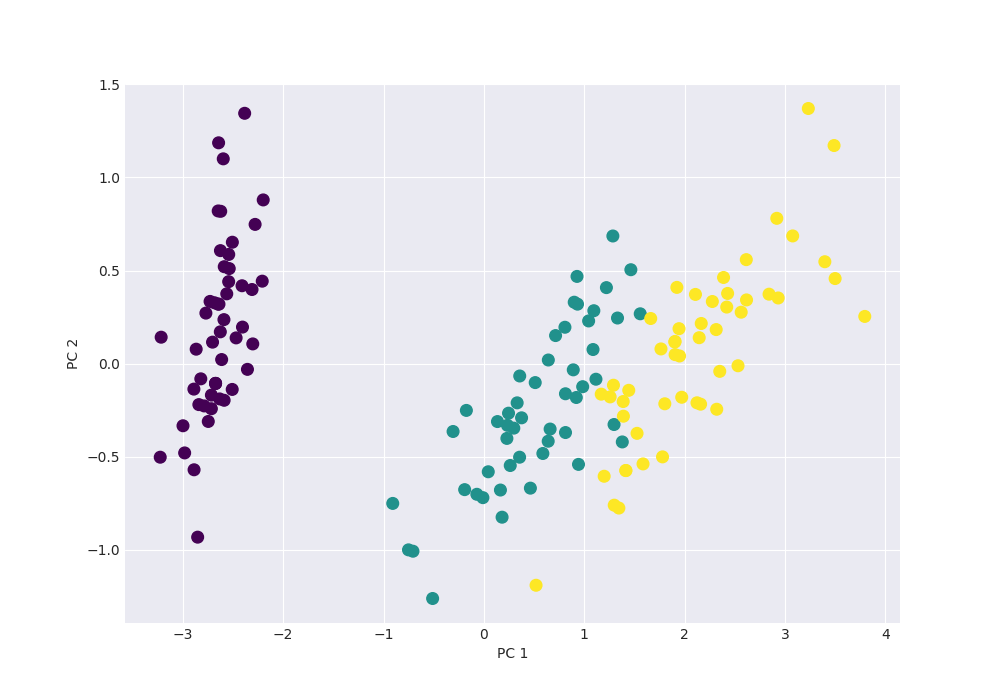

In [12]:
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_plt, s=70, cmap='viridis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

<div class="alert alert-block alert-success">
<b>Task</b> As we have seen above every PC is modeling some part of the variance of our original data. Now your task is to compute and display the parameters of the PCA model, fitted by scikit-learn, corresponding to the following questions: <ul>
    <li> How much of the original datas information is preserved if we reduce the dimensions to two? </li>
    <li> What portion of variance is lost if we would only use one PC?</li>
</ul>
</div>

In [16]:
# STUDENT CODE HERE (3pt)

pcaModel = decomposition.PCA()
pcaModel.fit_transform(X_centered)

#2PCs
info_pr_two = pcaModel.explained_variance_ratio_[:2].sum()
print("Information preserved with 2 PCs:", info_preserved_two)

# 2)variancelost with 1 PC
v_lost_one = 1 - pcaModel.explained_variance_ratio_[0]
print("Variance lost when using only 1 PC:", variance_lost_one)


# STUDENT CODE until HERE

Information preserved with 2 PCs: 0.9776317750248036
Variance lost when using only 1 PC: 0.07538379282573127


In general, the amount of information we re retained here should be enough to maintain a good representation of our dataset. In practice, we would choose the number of principal components such that we can explain at least __90% of the initial data dispersion__ (via the `explained_variance_ratio`). 

### 1.3.2 Accumulated Variance 
Below a function for plotting the individual explained variance ratio of each PC is given.

<div class="alert alert-block alert-success">
<b>Task:</b> Add a plot for the accumulated variance of all PCs. The <code>step()</code> function with option <code>where='mid'</code> is used to plot the cumulative variance. Fill in the appropriate gap by calculating the cumulative explained variance and name it <code>cum_var_exp</code>.

</div>

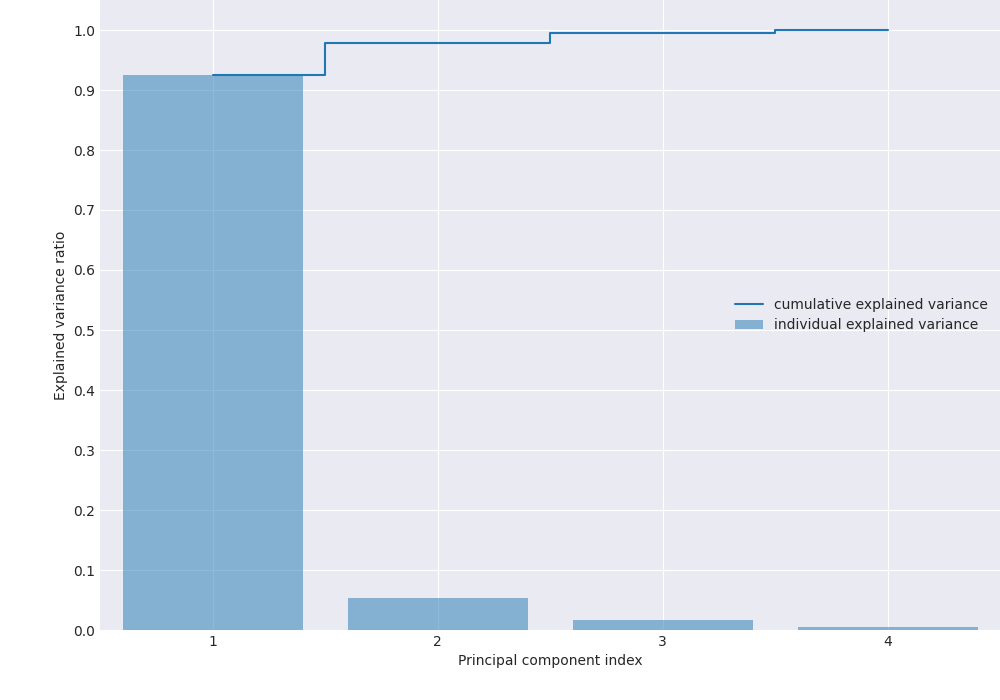

In [17]:
def plotPCAVariance(var_exp: np.ndarray, X: pd.DataFrame) -> Tuple[plt.Figure, plt.Axes]:
    #STUDENT CODE HERE (1pt)

    cum_var_exp = np.cumsum(pcaModel.explained_variance_ratio_)

    #STUDENT CODE until HERE
    
    #plotting individual explained variance is given
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])
    ax.bar(range(1, X.shape[1]+1), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
    ax.set_ylabel('Explained variance ratio')
    ax.set_xlabel('Principal component index')    
    ax.set_xlim(0.5, X.shape[1]+0.5)
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_xticks(np.arange(1,X.shape[1]+1,1))

    # plotting
    ax.step(range(1, X.shape[1]+1), cum_var_exp, where='mid',
         label='cumulative explained variance')
    ax.legend(loc='best')
    return fig, ax


## Function call

# fit to centered data with k=Number of Features
pca = decomposition.PCA().fit(X_centered)
# We have to get the explained variances for all PCs so we don't specify k when we call the PCA().fit() function.
var_exp = pca.explained_variance_ratio_
# Afterwards we can use the result as input for our function and plot the explained variances.
fig, ax = plotPCAVariance(var_exp, X_centered)

<div class="alert alert-block alert-success">
<b>Question (1 pt):</b> How many PCs do we have to choose, to explain at least 90% of the initial data dispersion? What does that mean for our feature space? What is the intrinsic dimension of the dataset?
</div>
<div class="alert alert-block alert-success">
<b>Your Answer:</b> in our cae only 1, as we saw above that the information lost after reducing 1 Pc was only
</div>

### 1.3.3 Influence of Scaling

Up to now, we always used the mean-centered dataset. But as we learned in earlier tasks, there exist various ways to scale our dataset before performing any action. One example is normalization aka Z-Standardization.

<div class="alert alert-block alert-success">
<b>Question (3 pts):</b>  What do you think would happen, if we use PCA on Z-Standardized data instead of mean-centered data? Explain briefly, why.
</div>
<div class="alert alert-block alert-success">
<b>Your Answer:</b> 
</div>

## 1.4 Principal Component Analysis Summary

In this section, we explored the use of Principal Component Analysis (PCA) for dimensionality reduction, visualizing high-dimensional data, and feature selection. Due to its versatility and interpretability, PCA is widely effective across various fields. When working with high-dimensional datasets, PCA is often the first tool used to visualize relationships, understand data variance, and determine intrinsic dimensionality by examining the explained variance ratio.

While PCA is not suitable for every high-dimensional dataset, it provides a straightforward, efficient way to gain insight into data structure.

### Limitations and Variants of PCA

One drawback of PCA is its sensitivity to data scaling and outliers. To address this, several robust PCA variants have been developed, many of which iteratively discard poorly fitting data points. Scikit-Learn includes interesting PCA variants in the `sklearn.decomposition` module:

- **RandomizedPCA**: Uses a non-deterministic method to approximate the first few principal components efficiently, especially useful for very high-dimensional data. It reduces computational complexity to $\mathcal{O}(m \cdot d^2) + \mathcal{O}(d^3)$ from the traditional $\mathcal{O}(m \cdot n^2) + \mathcal{O}(n^3)$, making it more efficient when \(d\) (number of principal components) is much smaller than \(n\) (number of original features).
- **SparsePCA**: Introduces a regularization term to enforce sparsity in the components, beneficial for cases where feature interpretability is important.

A challenge with standard PCA (implemented via Singular Value Decomposition, SVD) is that it requires the entire dataset to fit into memory. For larger datasets, **Incremental PCA (IPCA)** provides a solution by processing the data in smaller portions, making it suitable for streaming data environments. In IPCA, each data subset is processed with the `partial_fit()` method, instead of loading the full dataset into memory.

These PCA variants extend the method's utility and applicability, especially for large-scale or real-time data applications.


# Appendix A: Computing PCA via SVD

Calculating PCA using the covariance matrix can be error-prone and memory-intensive. Fortunately, Singular Value Decomposition (SVD), a standard matrix factorization technique, enables an efficient alternative approach. SVD decomposes the data matrix $X$ into the product of three matrices: $U \cdot S \cdot V^T$, where $V$ contains the principal components we seek:

$$\Large
V = \begin{pmatrix}
\mid & \mid & & \mid \\
{\bf c}_{1} & {\bf c}_{2} & \cdots & {\bf c}_{n}\\
\mid & \mid & & \mid \\
\end{pmatrix}
$$

In fact, scikit-learn’s PCA implementation leverages SVD to compute the principal components.

The matrix $\mathbf{S}$ in this decomposition contains the singular values:

$$\Large
\mathbf{S} = \begin{pmatrix}
\sigma_1 &          &          &        & \cdots &        \\
         & \ddots   &          & \cdots & 0      & \cdots \\
         &          & \sigma_r &        & \cdots &        \\
\hline
         &  \vdots  &          &        & \vdots &        \\
\cdots   &  0       & \cdots   & \cdots & 0      & \cdots \\
         &  \vdots  &          &        & \vdots &        \\
\end{pmatrix}
$$

Here, the vectors $c_1$ through $c_n$ are the principal components, each representing a direction of maximal variance. But what do the singular values in $\mathbf{S}$ represent? The squared singular values correspond to the eigenvalues of $X^T \cdot X$ (note: singular values and eigenvalues are not the same). Each eigenvalue is proportional to the explained variance in the direction of its associated eigenvector. Similarly, the squared singular values reflect the variance along each principal component (the new feature dimensions). 

The sum of all squared singular values equals the total variance, or the sum of squared distances of the points from their mean in multidimensional space. Because the covariance matrix can also be expressed as $X^T \cdot X$, the squared singular values are proportional to the variance explained, just as the eigenvalues of the covariance matrix are.

$$\Large
\frac{\sigma_i^2}{\sum_i \sigma_i^2} = \frac{\lambda_i}{\sum_i \lambda_i}
$$

where $\lambda$ represents the eigenvalues of $\text{cov}(X)$. Thus, each squared singular value explains the same proportion of variance as the corresponding eigenvalues of the original covariance matrix.
